Title: Building Permit Seattle
Sources: https://dev.socrata.com/foundry/data.seattle.gov/i5jq-ms7b

Dataset is provided by Seattle Department of Construction and Inspections.  
It lists building permits issued in the past five years or currently in progress.
The dataset has 55.7K rows and 20 columns.  The column descriptions are in README.

We'll analyze the Building Permit Data with pandas, numpy and matplotlib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

dataset = pd.read_csv('/Users/owy1/codefellows/401/machine-learning/Building_Permits_Current.csv', encoding = "ISO-8859-1")
print(dataset[:5]) #print first 5 rows of data to verify import"

   Application/Permit Number       Permit Type              Address  \
0                    6578806      Construction        706 N 77TH ST   
1                    6409682  Site Development  388R LAKESIDE AVE S   
2                    6529715      Construction    9820 TRITON DR NW   
3                    6578702      Construction  12044 FREMONT AVE N   
4                    6564726      Construction      5602 39TH AVE W   

                                         Description                Category  \
0  Construct interior alterations on main floor o...  SINGLE FAMILY / DUPLEX   
1  Shoreline Exemption to allow soil boring in st...                     NaN   
2  Removal of non-permitted roof-top (3rd floor) ...  SINGLE FAMILY / DUPLEX   
3  Construct interior alterations to an existing ...  SINGLE FAMILY / DUPLEX   
4  Exterior maintenance only, siding, windows, ro...  SINGLE FAMILY / DUPLEX   

                Action Type       Work Type         Value     Applicant Name  \
0           

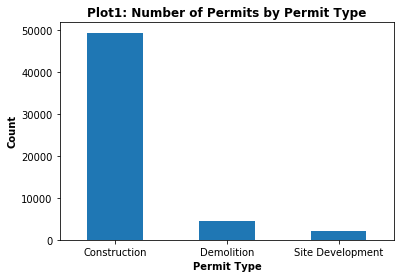

In [2]:
dataset["Permit Type"].value_counts().plot(kind='bar', rot=0)

plt.title("Plot1: Number of Permits by Permit Type", weight='bold')

plt.xlabel("Permit Type", weight='bold')

plt.ylabel("Count", weight='bold')

plt.show()

So now we know most permits go to construction type, let's find out some statistics: average, maximum and minimum values of each type of permit

In [3]:
columns = ['Average', 'Maximum', 'Minimum']
permit_type = ['Construction', 'Demolition', 'Site Development']
df_temp = pd.DataFrame(index=permit_type, columns=columns)
df_temp = df_temp.fillna(0)

subdata = dataset[['Permit Type', 'Value','Category']]
# print(subdata[:3])
data_construct = subdata[subdata['Permit Type'] == 'Construction']
data_demolt = subdata[subdata['Permit Type'] == 'Demolition']
data_deve = subdata[subdata['Permit Type'] == 'Site Development']

construct_max = max(data_construct["Value"])
construct_min = min(data_construct["Value"])
construct_max = int(''.join(c for c in construct_max if c.isdigit()))
construct_min = int(''.join(c for c in construct_min if c.isdigit()))
construct_avg = np.around(((construct_max - construct_min) / len(data_construct)),2)

demolt_max = max(data_demolt["Value"])
demolt_min = min(data_demolt["Value"])
demolt_max = int(''.join(c for c in demolt_max if c.isdigit()))
demolt_min = int(''.join(c for c in demolt_min if c.isdigit()))
demolt_avg = np.around(((demolt_max - demolt_min) / len(data_demolt)),2)

deve_max = max(data_deve["Value"])
deve_min = min(data_deve["Value"])
deve_max = int(''.join(c for c in deve_max if c.isdigit()))
deve_min = int(''.join(c for c in deve_min if c.isdigit()))
deve_avg = np.around(((deve_max - deve_min) / len(data_deve)),2)


df_temp.loc["Construction"] = pd.Series({"Average":construct_avg,"Maximum":construct_max, "Minimum":construct_min  })
df_temp.loc["Demolition"] = pd.Series({"Average":demolt_avg,"Maximum":demolt_max, "Minimum":demolt_min  })
df_temp.loc["Site Development"] = pd.Series({"Average":deve_avg,"Maximum":deve_max, "Minimum":deve_min  })
print('{:^50}'.format('Table 1'))
print(df_temp)


                     Table 1                      
                  Average     Maximum  Minimum
Construction      2025.11  99815800.0      0.0
Demolition        2200.54   9823200.0      0.0
Site Development  4797.98   9500000.0      0.0


Interestingly, although the maximum of construction bid would run to $100 million, the average is around $2000, around the same as demolition but less than site development.  Let's see what they are building.

In [4]:
print(data_construct.Category.unique())

['SINGLE FAMILY / DUPLEX' 'COMMERCIAL' 'MULTIFAMILY' 'INDUSTRIAL'
 'INSTITUTIONAL' nan]


We'll plot a bar charts of construction categories.

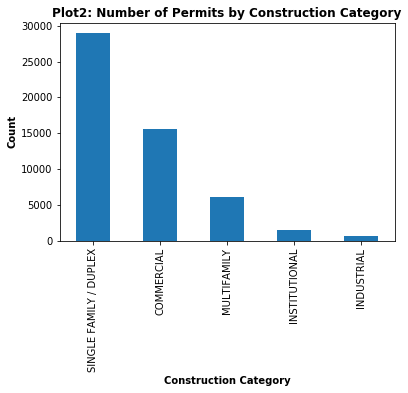

In [5]:
dataset["Category"].value_counts().plot(kind='bar')

plt.title("Plot2: Number of Permits by Construction Category", weight='bold')

plt.xlabel("Construction Category", weight='bold')

plt.ylabel("Count", weight='bold')

plt.show()

There are almost 30000 single family homes built in Seattle the past five years.